## Decision Trees

Decision trees are one of the most popular machine learning algorithms used for classification and regression tasks. They work by recursively splitting the data based on the features that provide the most information gain in separating the classes. However, the effectiveness of decision trees for your specific problem depends on several factors, including the number of explanatory variables, class imbalance, and the correlation between the variables and the target.

A binary classification problem with 79 explanatory variables and an imbalanced class ratio of 1:15, means that there are far fewer positive samples (is claim = 1) than negative samples (is claim = 0) in your dataset. This imbalance can lead to several issues when training a decision tree:

1. Bias towards the majority class: The decision tree algorithm tries to minimize the overall impurity of the dataset by creating splits that separate the positive and negative samples. However, in the case of imbalanced data, the algorithm may end up creating splits that favor the majority class, leading to poor performance on the minority class.
2. Overfitting: Decision trees are prone to overfitting when the number of features is high relative to the sample size, and the dataset is noisy. In your case, with 79 explanatory variables, the decision tree may create many splits, resulting in a complex model that fits the noise in the data rather than the underlying pattern.
3. Uninformative variables: With 79 variables, it's possible that many of them are uninformative and do not contribute to the prediction of the target variable. Including such variables in the model can lead to poor performance and increased complexity.
However, decision trees can also be a good choice for your problem under certain conditions:

Nonlinear relationships: Decision trees can capture nonlinear relationships between the explanatory variables and the target variable, which may be useful if the relationship is not easily modeled by a linear algorithm.
1. Interpretable: Decision trees are easy to interpret and provide insights into the decision-making process, making it easy to explain to non-experts.
2. Handles missing data: Decision trees can handle missing data by using surrogate splits, making it a useful algorithm when dealing with real-world datasets that often have missing values.

Using oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help alleviate the class imbalance problem and improve the performance of decision trees.

SMOTE works by creating synthetic samples for the minority class by interpolating between the existing samples in the feature space. By adding more positive samples to the dataset, it reduces the bias towards the majority class and provides the decision tree algorithm with more information to learn from. This can help improve the accuracy of the decision tree on the minority class while also reducing the risk of overfitting.

However, it's important to keep in mind that oversampling techniques like SMOTE can also introduce some potential issues:

1. Overfitting: Oversampling can lead to overfitting if the synthetic samples are too similar to the original ones, leading to a model that performs well on the training data but poorly on the test data.
2. Noise: The synthetic samples created by SMOTE may not be representative of the true distribution of the minority class, leading to the introduction of noise into the model.
3. Computationally expensive: SMOTE and other oversampling techniques can be computationally expensive, especially if the dataset is large, leading to longer training times.

Hence this section will have the following structure. First, using Grid Search, the best hyperparameters for the decision tree will be found, then the decision tree will be calulated. Next we consider the decision tree with oversampling by implementing SMOTE to rebalance the classes to have a new resampled data set with equal number of classes 0 and 1. Then the decision tree is implemented the same way as before. The results are then collected in a table and assessed at the end of the section. 

In [1]:
# This can be deleted once the final notebook is created, just need it to import the data
import pandas as pd
dataset = pd.read_csv('../data/processed_data.csv')
dataset.head()
dataset.drop('Unnamed: 0', axis=1)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,0.05,0.644231,1,4990,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,2,27003,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.841110,0.02,0.384615,3,4076,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.11,0.432692,4,21622,1,2,2,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,5,34738,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8,8794,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
58588,1.199642,0.02,0.519231,14,7788,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58589,1.162273,0.05,0.451923,5,34738,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58590,1.236307,0.14,0.557692,8,8794,1,6,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [2]:
dataset = dataset[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'model', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque_113Nm@4400rpm', 'torque_170Nm@4000rpm', 'torque_200Nm@1750rpm',
       'torque_200Nm@3000rpm', 'torque_250Nm@2750rpm', 'torque_60Nm@3500rpm',
       'torque_82.1Nm@3400rpm', 'torque_85Nm@3000rpm', 'torque_91Nm@4250rpm',
       'power_113.45bhp@4000rpm', 'power_118.36bhp@5500rpm',
       'power_40.36bhp@6000rpm', 'power_55.92bhp@5300rpm',
       'power_61.68bhp@6000rpm', 'power_67.06bhp@5500rpm',
       'power_88.50bhp@6000rpm', 'power_88.77bhp@4000rpm',
       'power_97.89bhp@3600rpm', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'rear_brakes_Disc', 'rear_brakes_Drum',
       'transmission_type_Automatic', 'transmission_type_Manual', 'segment_A',
       'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2',
       'segment_Utility', 'steering_type_Electric', 'steering_type_Manual',
       'steering_type_Power', 'engine_type_1.0 SCe',
       'engine_type_1.2 L K Series Engine', 'engine_type_1.2 L K12N Dualjet',
       'engine_type_1.5 L U2 CRDi', 'engine_type_1.5 Turbocharged Revotorq',
       'engine_type_1.5 Turbocharged Revotron',
       'engine_type_F8D Petrol Engine', 'engine_type_G12B',
       'engine_type_K Series Dual jet', 'engine_type_K10C',
       'engine_type_i-DTEC']]
dataset.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'model', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque_113Nm@4400rpm', 'torque_170Nm@4000rpm', 'torque_200Nm@1750rpm',
       'torque_200Nm@3000rpm', 'torque_250Nm@2750rpm', 'torque_60Nm@3500rpm',
       'torque_82.1Nm@3400rpm', 'torque_85Nm@3000rpm', 'torque_91Nm@4250rpm',
       'power_113.45bhp@4000rpm', 'power_118.36bhp@5500rpm',
       'power

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_val_score

Accuracy: 0.9350627186620019
Recall: 0.4997719602298641


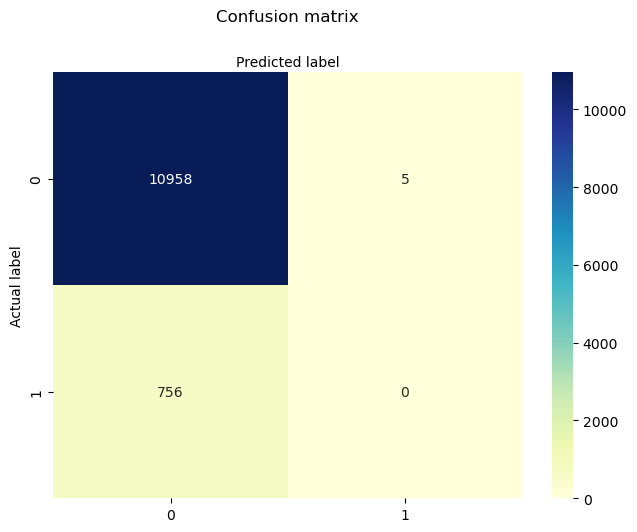

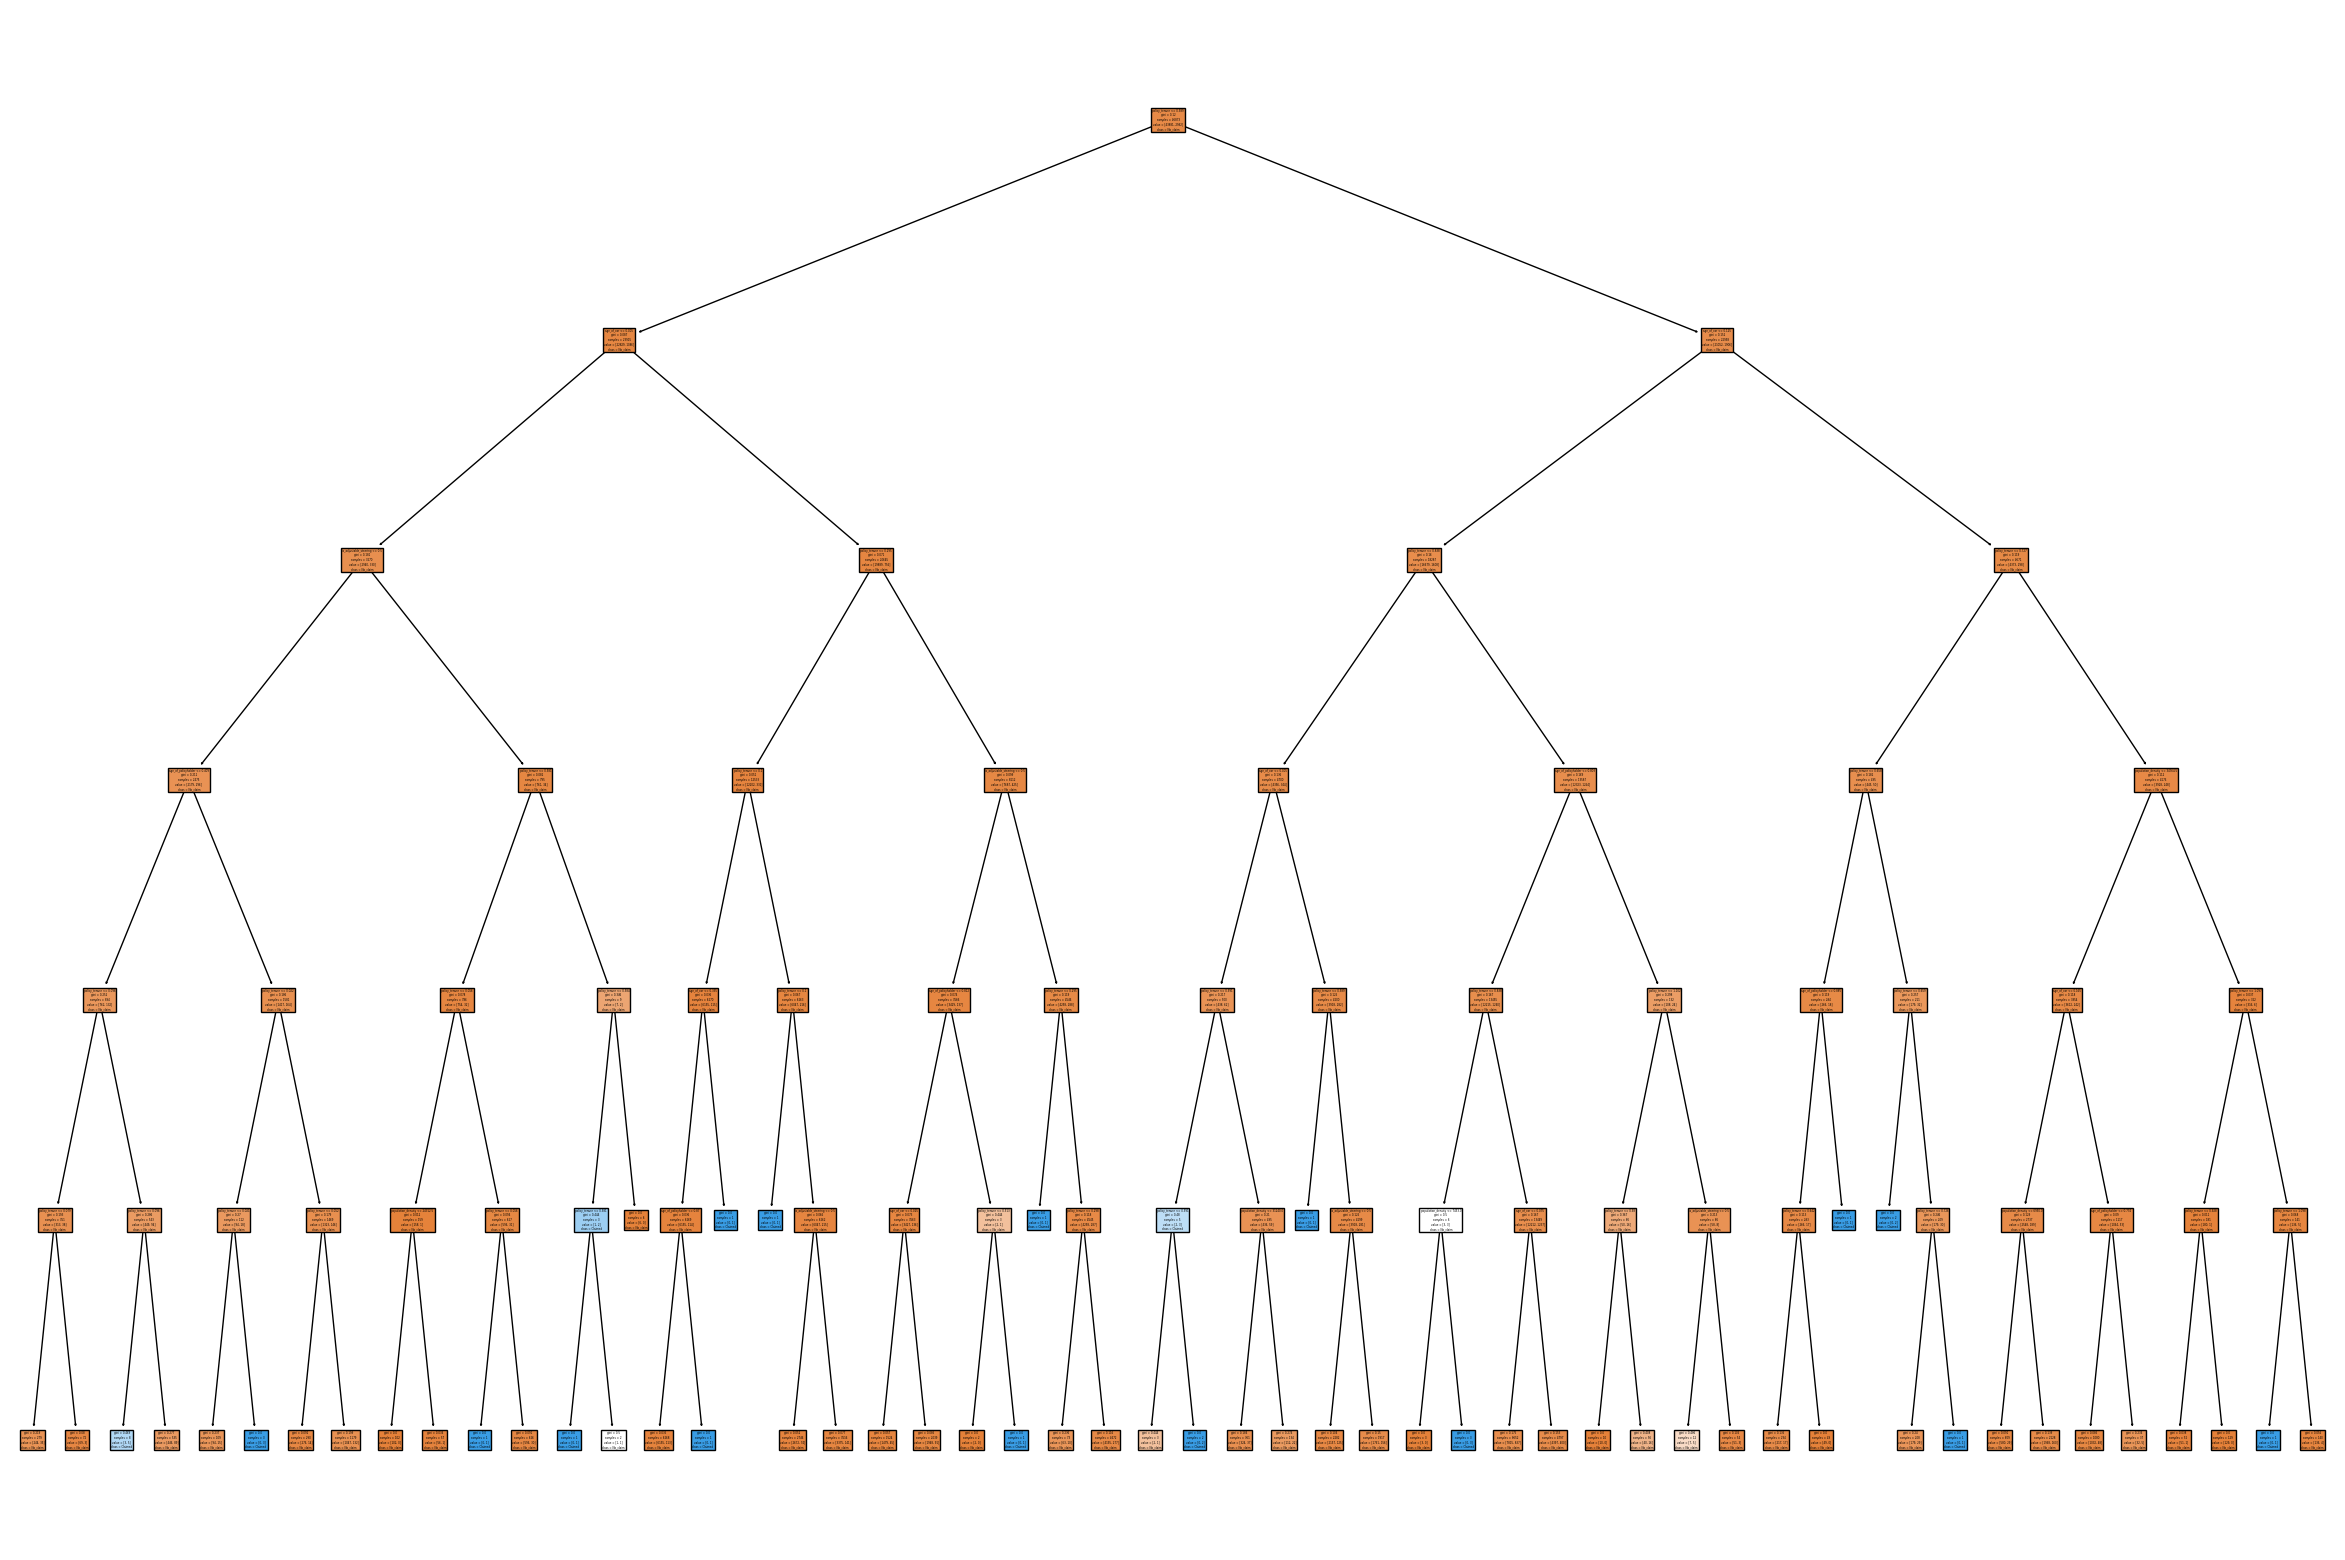

              precision    recall  f1-score   support

    No_claim       0.94      1.00      0.97     10963
     Claimed       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



In [21]:
#split dataset in features and target variable
X = dataset[['policy_tenure','age_of_car','age_of_policyholder','population_density','is_adjustable_steering']]# Features
y = dataset.is_claim # Target variable
features = X.columns

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=6, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

In [23]:
results_all = {'Feature selection method': ['Decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}

df = pd.DataFrame(results_all)
df

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,Decision tree,0.0,0.935063,0.0,0.499772,0.0


When there are zeros or very low values in the True Negatives (TN) and False Positives (FP) cells of the confusion matrix, it can indicate that the model is not able to correctly predict negative samples. This can lead to poor performance metrics, such as low precision or recall.

For example, if the TN cell is zero or close to zero, it means that the model is not able to correctly identify true negatives, which are cases where the actual class is negative and the model also predicts it as negative. This can lead to a high number of false positives (FP), which are cases where the actual class is negative, but the model predicts it as positive. In this case, the precision of the model can be affected because it is calculated as the ratio of true positives to the sum of true positives and false positives.

Similarly, if the FP cell is zero or close to zero, it means that the model is not able to correctly identify false positives, which are cases where the actual class is positive, but the model predicts it as negative. This can lead to a high number of false negatives (FN), which are cases where the actual class is positive, but the model predicts it as negative. In this case, the recall of the model can be affected because it is calculated as the ratio of true positives to the sum of true positives and false negatives.

In general, a model that is not able to correctly predict negative samples can indicate that there are issues with the model's training or that the dataset is imbalanced. To address this issue, you can try techniques such as adjusting the class weights, oversampling the minority class, or using a different algorithm that is better suited for imbalanced datasets.

Accuracy: 0.5084051540233808
Recall: 0.6184094093311461


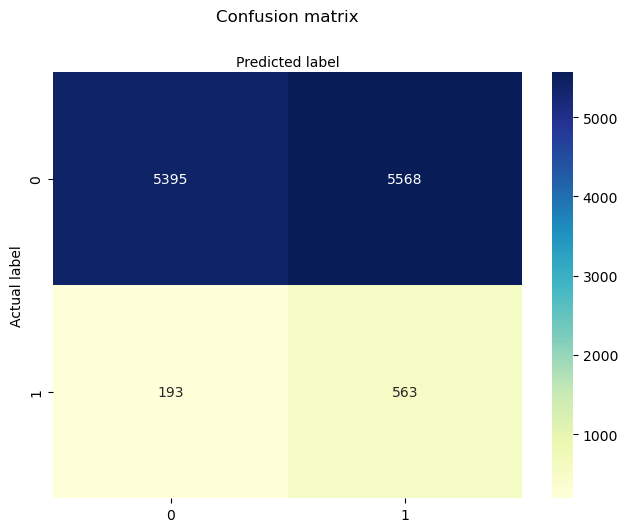

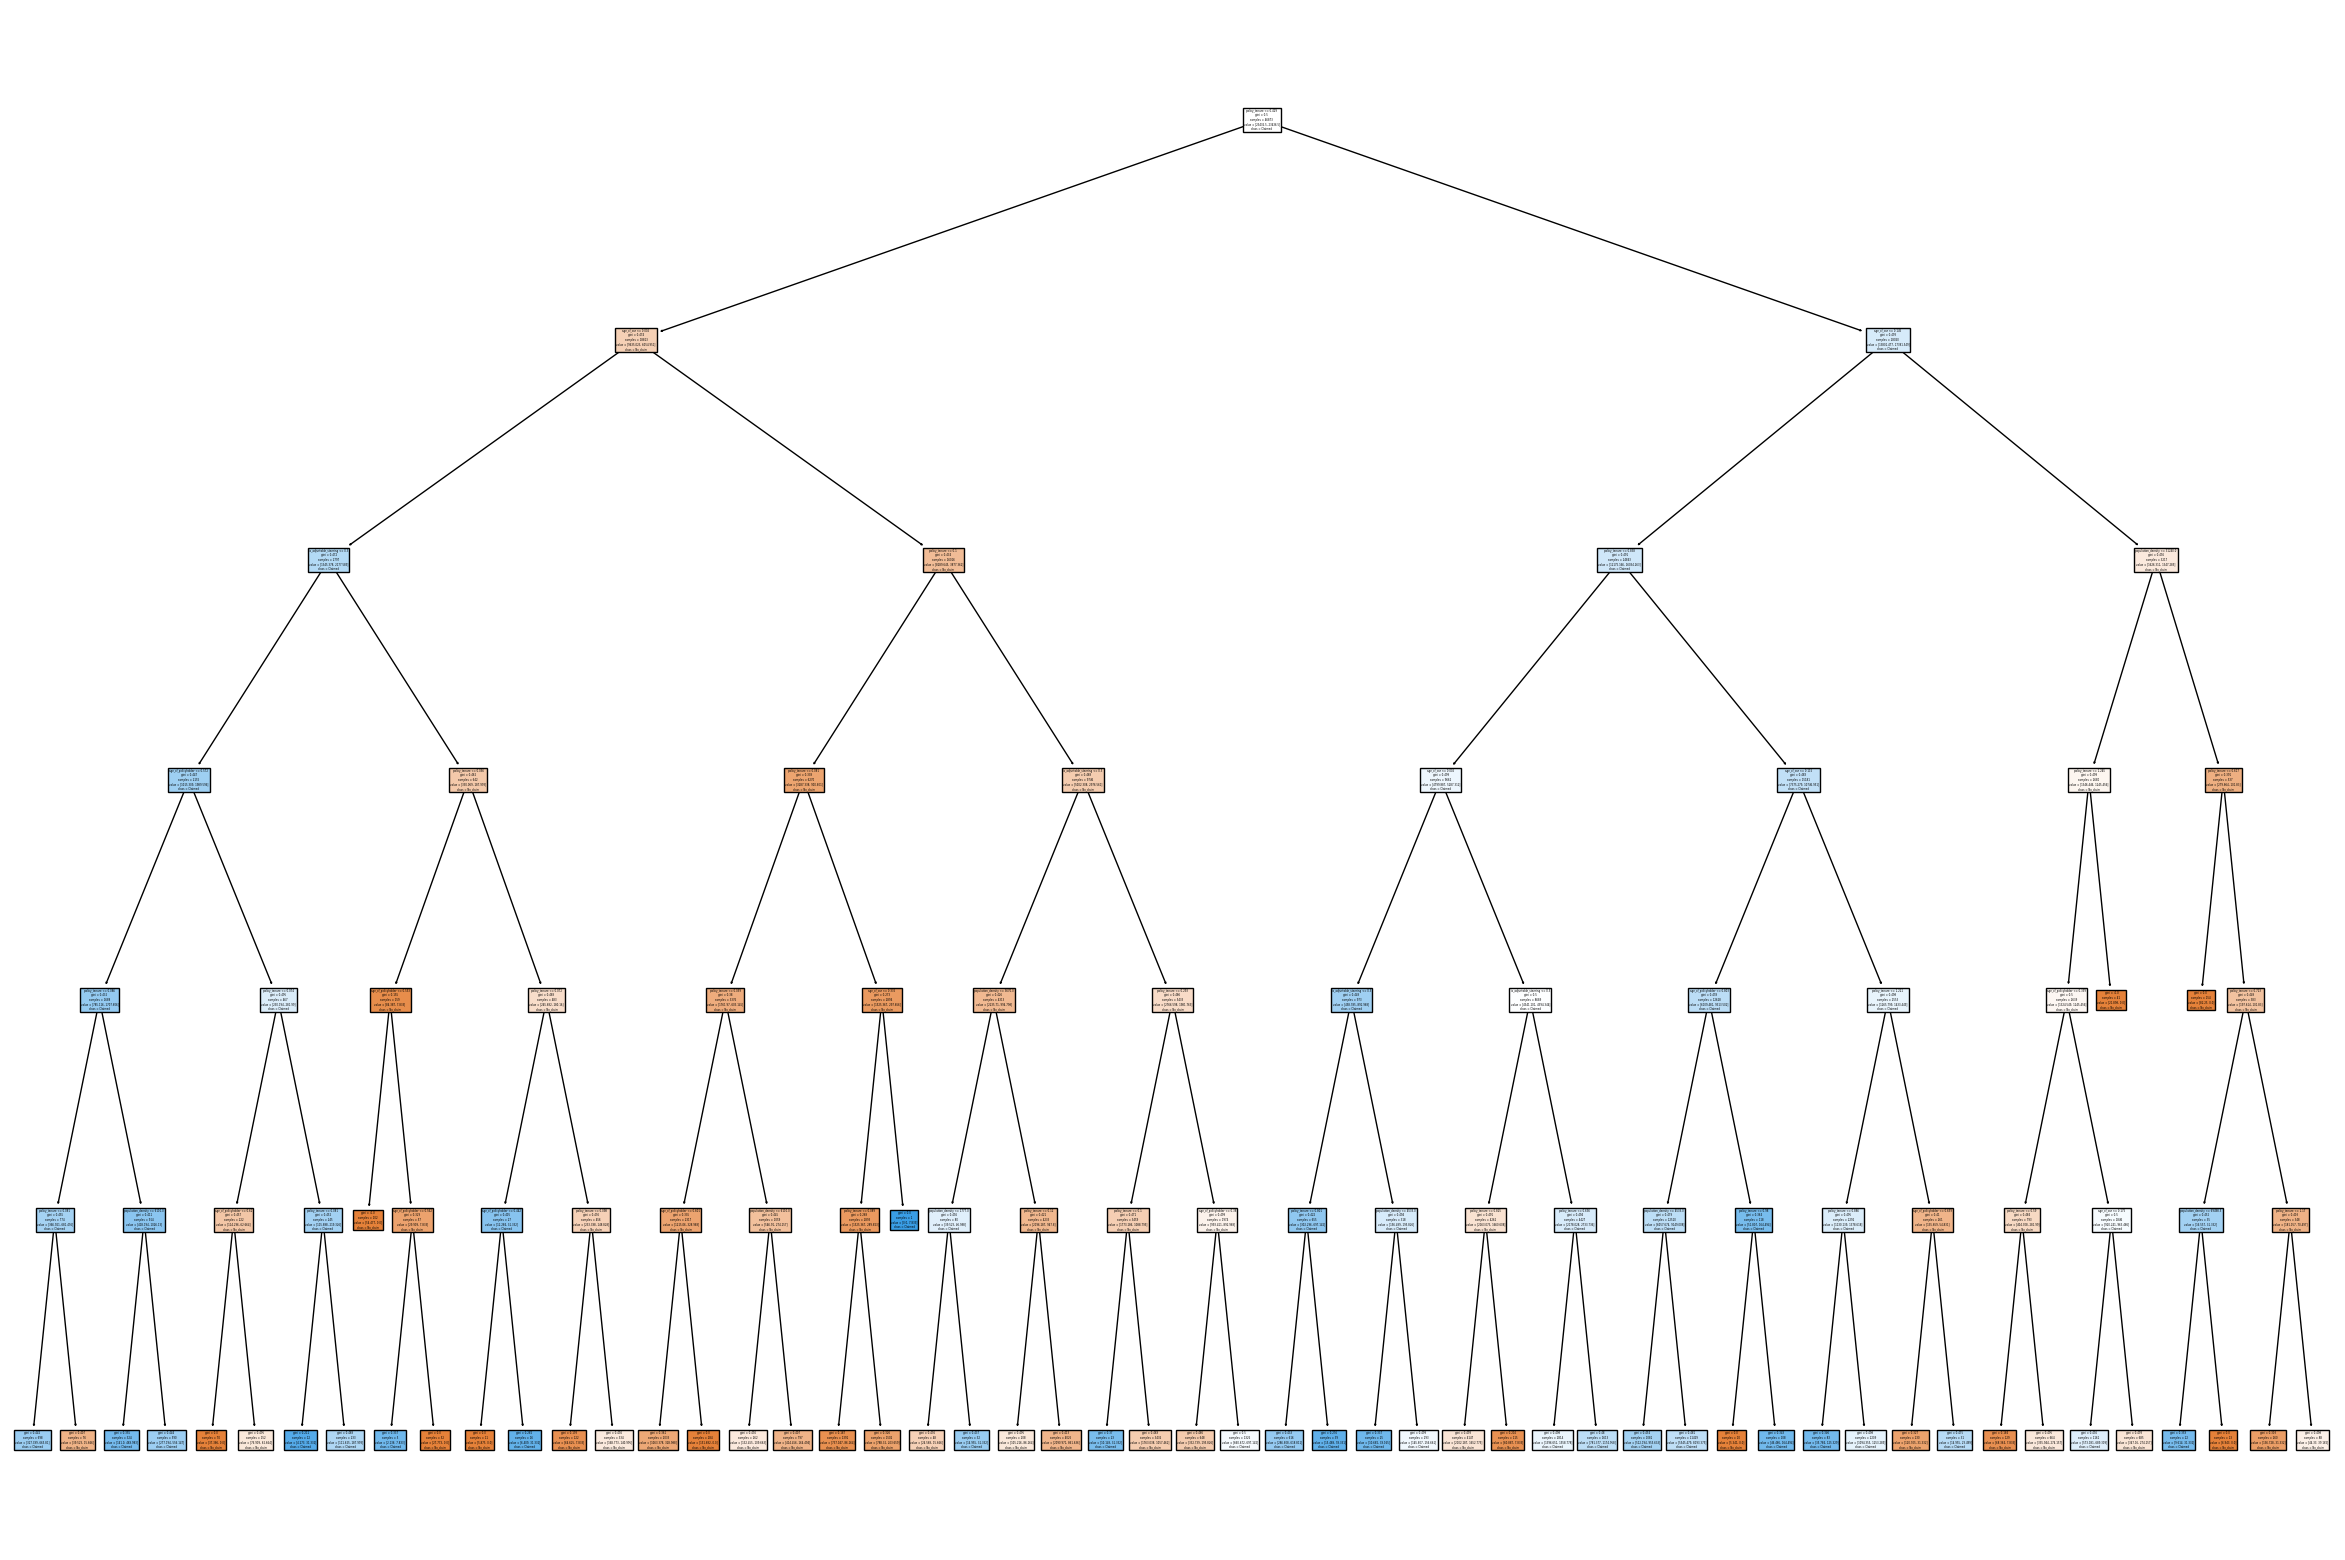

              precision    recall  f1-score   support

    No_claim       0.97      0.49      0.65     10963
     Claimed       0.09      0.74      0.16       756

    accuracy                           0.51     11719
   macro avg       0.53      0.62      0.41     11719
weighted avg       0.91      0.51      0.62     11719



In [24]:
#split dataset in features and target variable
X = dataset[['policy_tenure','age_of_car','age_of_policyholder','population_density','is_adjustable_steering']]# Features
y = dataset.is_claim # Target variable
features = X.columns

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

- Accuracy: The accuracy score measures the proportion of correctly classified samples in the test dataset. It is calculated as the sum of true positives and true negatives divided by the total number of samples. This metric is often used as a baseline to evaluate the performance of a classification model.  
- Macro average: The macro-average calculates the metric independently for each class and then takes the average over all classes. For example, the macro-average precision is calculated as the average of the precision scores for each class.
- Weighted average: The weighted-average is similar to the macro-average, but it takes into account the proportion of samples in each class. This is important when classes are imbalanced, as it gives more weight to the metrics of the classes with more samples. The weighted-average is calculated as the sum of the metric for each class multiplied by the number of samples in that class, divided by the total number of samples.

As noted before in other models, due to the fact that we have uneven weights in our classes. The best option would be to take the weighed average scores provided by the classification report. 

In [25]:
results_all = {'Feature selection method': ['Balanced decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}

df2 = pd.DataFrame(results_all)
df = df.append(df2, ignore_index=True)
df

/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_14299/987445520.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,Decision tree,0.000000,0.935063,0.000000,0.499772,0.000000
1,Balanced decision tree,0.163496,0.508405,0.091828,0.618409,0.744709


In DecisionTreeClassifier, max_depth is a parameter that controls the maximum depth of the decision tree. The depth of a decision tree is the length of the longest path from the root node to any leaf node.

Setting max_depth can help to prevent overfitting by limiting the complexity of the tree. A tree that is too deep can overfit the training data, meaning that it will perform well on the training data but poorly on new, unseen data.

By limiting the depth of the tree, the model is less likely to overfit and more likely to generalize well to new data. However, setting max_depth too low can also lead to underfitting, where the model is too simple and does not capture the underlying patterns in the data.

A good strategy is to try different values of max_depth and evaluate the performance of the model on a validation set or using cross-validation. This can help you to find the optimal value of max_depth that balances the trade-off between overfitting and underfitting.

In [32]:
from sklearn.model_selection import GridSearchCV

# Create the decision tree model
model = DecisionTreeClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': range(1, 31)
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best average F1 score: {grid_search.best_score_:}')

Best hyperparameters: {'max_depth': 29}
Best average F1 score: 0.9052564439571988


It is possible that the model is overfitting the data by selecting a max_depth that is too high. One possible explanation for why the max_depth keeps increasing is that the decision tree is able to fit the training data better and better as the depth increases, and so the cross-validation score continues to improve.

However, as you mentioned, a decision tree that is too deep can overfit the training data and perform poorly on new, unseen data. One way to prevent overfitting is to use regularization techniques such as pruning, which remove branches of the tree that do not improve the performance on the validation set.

One option to try is to use a smaller range of max_depth values in the param_grid, for example, by reducing the upper bound of the range. This can prevent the model from overfitting and give you a better estimate of the optimal max_depth.

Alternatively, you can try using a different evaluation metric such as accuracy, precision, or recall, or a combination of metrics using scikit-learn's make_scorer function, to see if the optimal max_depth changes. This can help you to select a model that performs well across multiple metrics, rather than just one.

### Decision Tree with oversampling

Both class_weight='balanced' and oversampling techniques such as SMOTE aim to address the issue of imbalanced datasets in classification problems.

The main difference between these two approaches is how they address the imbalance.

When you set class_weight='balanced', the model adjusts the weights of each class during the training process, so that the model pays more attention to the minority classes. This approach can work well when the imbalance is not severe, or when the dataset is not too large.

On the other hand, oversampling techniques such as SMOTE generate synthetic samples for the minority classes, effectively increasing the number of samples in these classes. This can work well when the imbalance is severe, or when the dataset is large.

While SMOTE oversampling can be an effective way to address class imbalance, there are some potential downsides to using it with a decision tree:

- Overfitting: Oversampling with SMOTE can introduce synthetic samples that are similar to existing samples in the minority class, which can increase the risk of overfitting. This can be particularly problematic with decision trees, which are prone to overfitting if the tree is too complex.  
- Loss of information: Oversampling with SMOTE can potentially introduce bias into the dataset by replicating minority class samples, which can result in a loss of information. This is because the oversampling may not accurately reflect the distribution of the minority class in the population.  
- Difficulty in interpretation: Oversampling with SMOTE can make the decision tree more complex, which can make it harder to interpret the tree and understand how it is making predictions.  

In [26]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE()

# Fit and transform the data
X_oversampled, y_oversampled = smote.fit_resample(X, y) # this is the new resampled data set with equal number of classes 0 and 1 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state= 42)

# Create and fit the decision tree model
model = DecisionTreeClassifier(random_state=42)
scores_f1 = cross_val_score(model, X_train, y_train, scoring="f1", cv=10)
scores_f1.mean()

0.9142208866631776

Accuracy: 0.6497401768620659
Recall: 0.6514741026703122


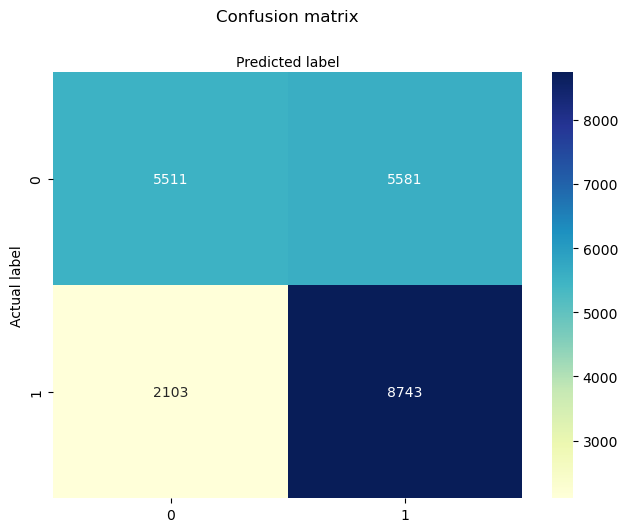

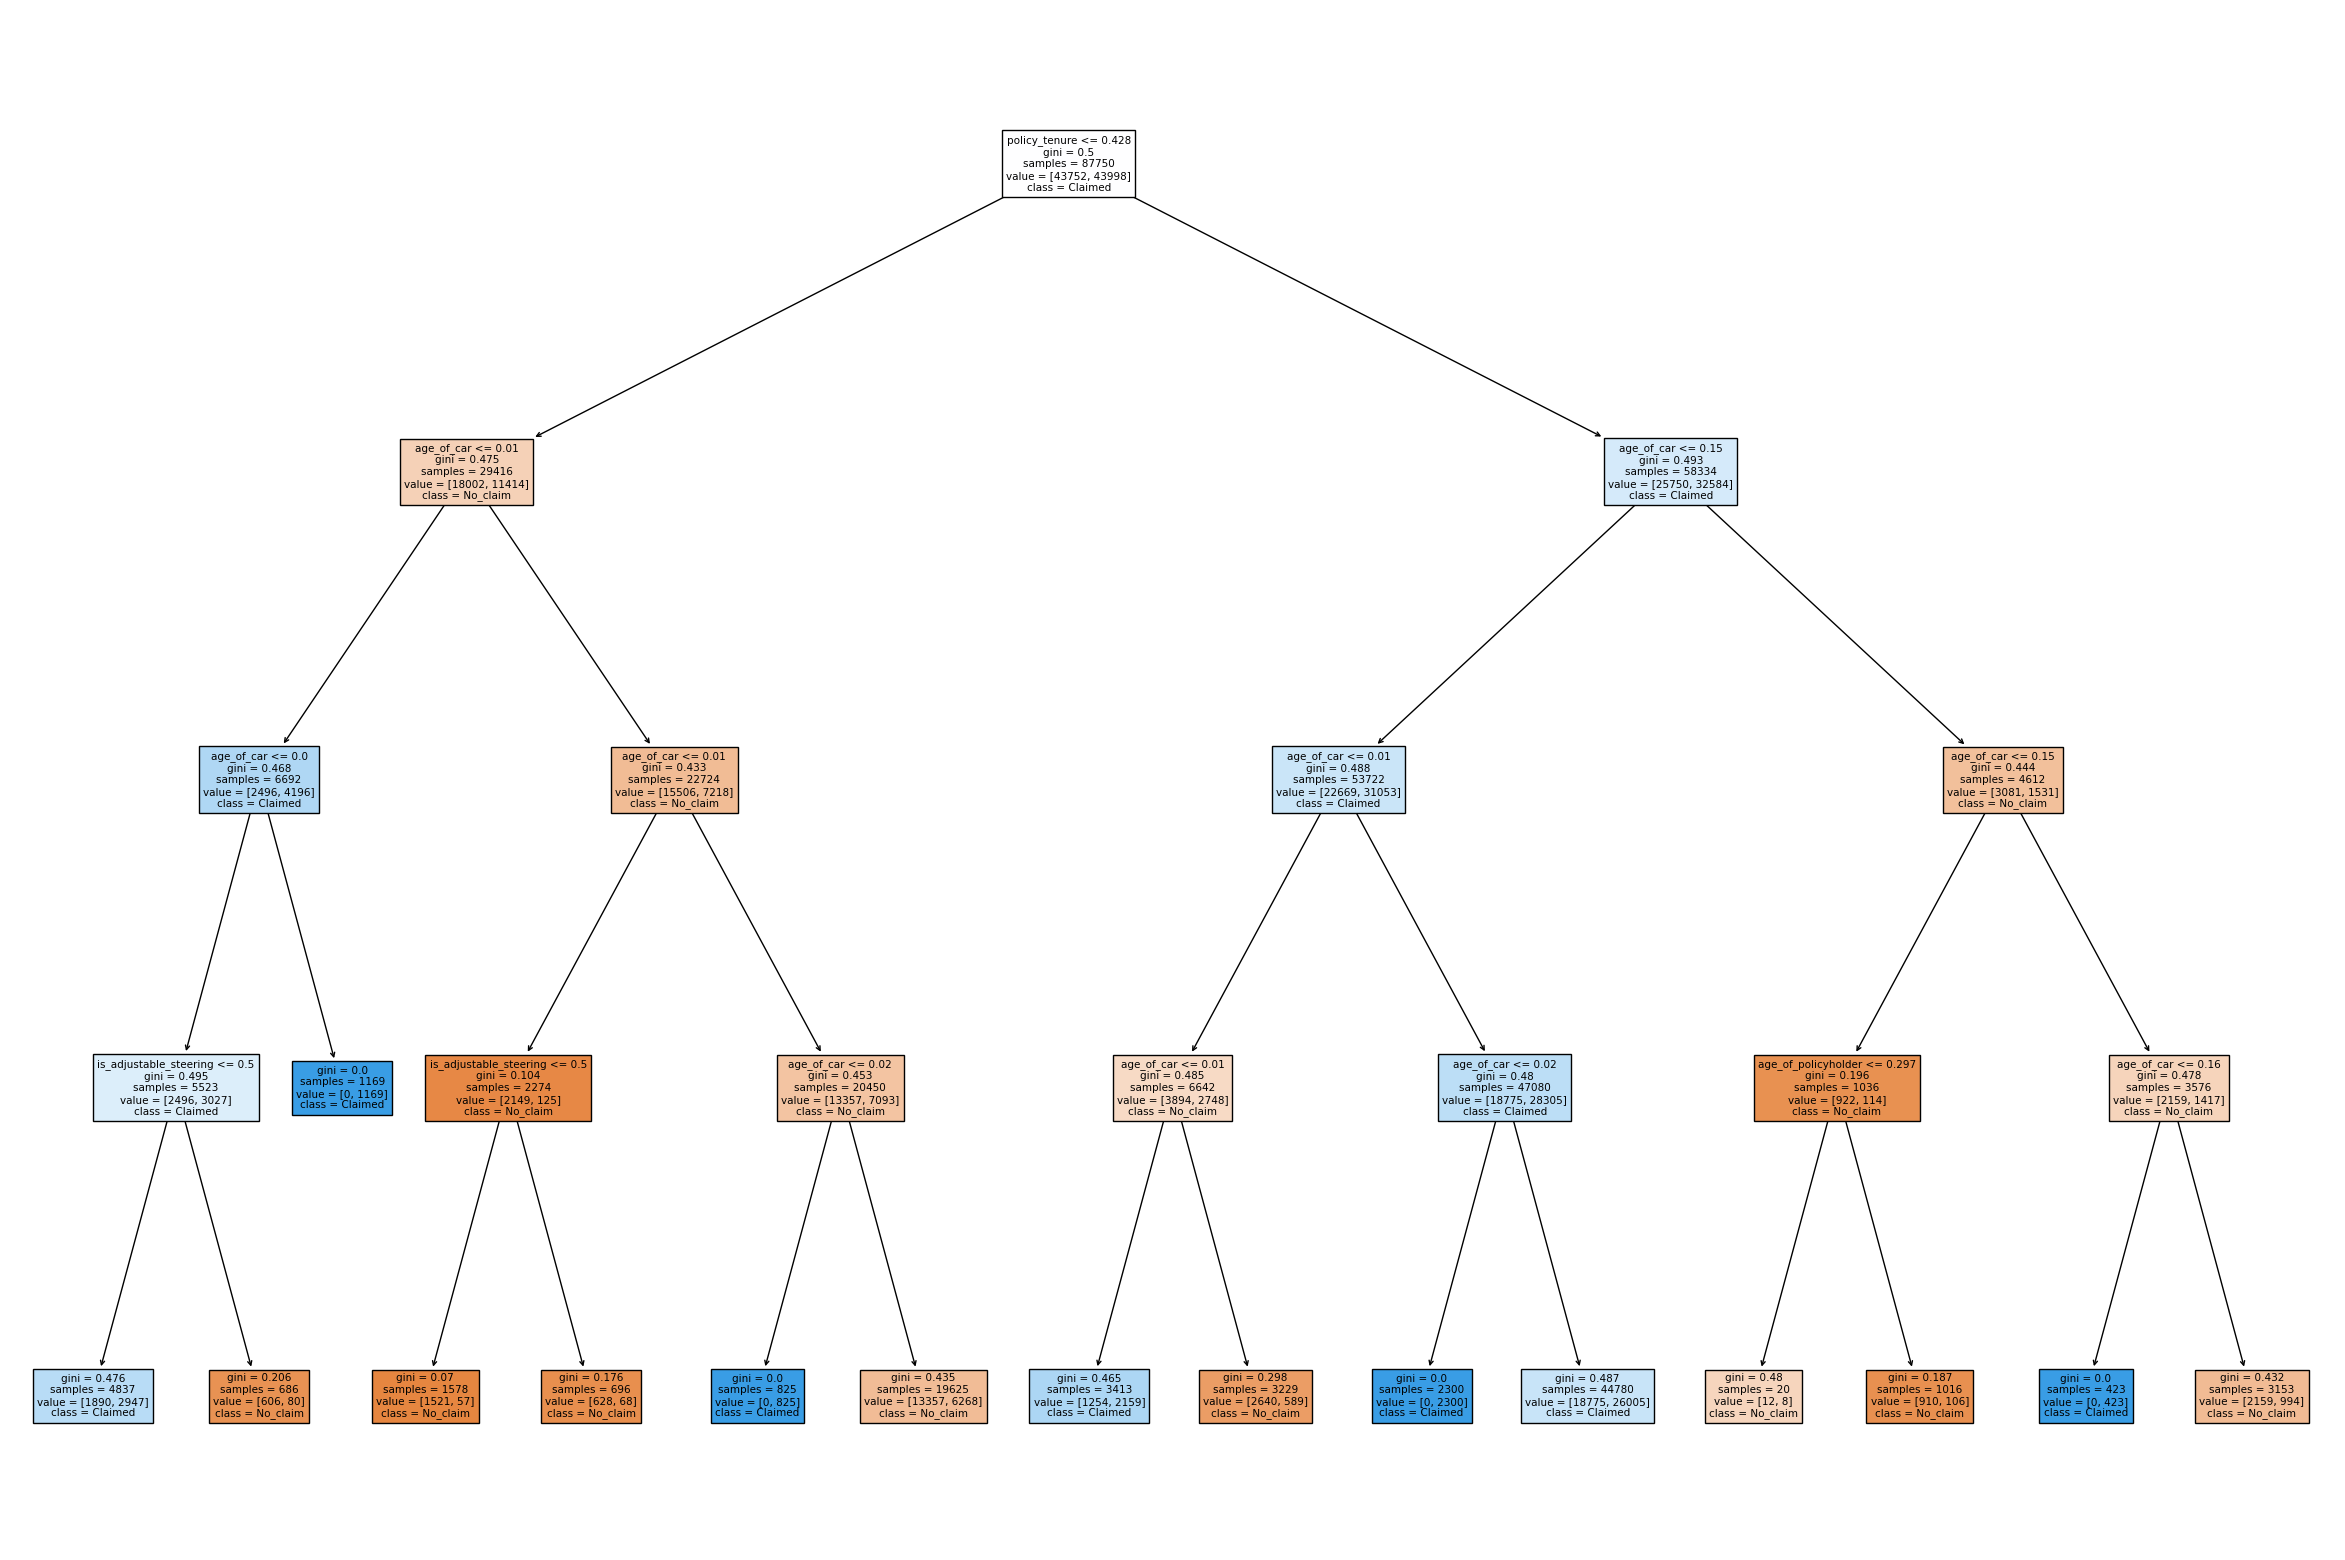

              precision    recall  f1-score   support

    No_claim       0.72      0.50      0.59     11092
     Claimed       0.61      0.81      0.69     10846

    accuracy                           0.65     21938
   macro avg       0.67      0.65      0.64     21938
weighted avg       0.67      0.65      0.64     21938



In [28]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

In [29]:
results_all = {'Feature selection method': ['Oversampled decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}

df3 = pd.DataFrame(results_all)
df = df.append(df3, ignore_index=True)
df

/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_14299/1125107751.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3, ignore_index=True)


,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,Decision tree,0.000000,0.935063,0.000000,0.499772,0.000000
1,Balanced decision tree,0.163496,0.508405,0.091828,0.618409,0.744709
2,Oversampled decision tree,0.694716,0.649740,0.610374,0.651474,0.806104


Looking at the results of the three different methods, we can see that:

- Decision tree: The F1 score is 0.0, which indicates that the model is not able to correctly classify any of the positive samples, as precision, recall and F1 score are all 0. The accuracy is relatively high at 0.935, but this is likely because the dataset is highly imbalanced and the model is predicting the majority class most of the time. The ROC-AUC score is close to 0.5, which indicates that the model is not able to distinguish between positive and negative samples.
- Balanced decision tree: The F1 score has improved to 0.163, indicating that the model is now able to correctly classify some of the positive samples, although the precision is still quite low at 0.091. The accuracy has decreased significantly to 0.508, which indicates that the model is now predicting the minority class more often. The ROC-AUC score has improved to 0.618, which indicates that the model is doing a better job of distinguishing between positive and negative samples.
- Oversampled decision tree: The F1 score has improved significantly to 0.695, indicating that the model is now able to correctly classify a large proportion of the positive samples. The precision has also improved to 0.610. The accuracy has also improved to 0.650, which is a good sign. The ROC-AUC score has improved slightly to 0.651, indicating that the model is doing a better job of distinguishing between positive and negative samples.

Based on these results, it seems that oversampling the minority class has resulted in the best overall performance in terms of the F1 score, precision, accuracy and ROC-AUC score. 